In [1]:
import requests
import pandas as pd 

In [2]:
endpoint = 'https://pokeapi.co/api/v2/pokemon/'

In [3]:
r = requests.get(endpoint)
r.status_code

200

In [4]:
data=r.json()

In [5]:
data

{'count': 1281,
 'next': 'https://pokeapi.co/api/v2/pokemon/?offset=20&limit=20',
 'previous': None,
 'results': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
  {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
  {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
  {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
  {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
  {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
  {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
  {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
  {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
  {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
  {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
  {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
  {'name': 'weedle', '

In [6]:
data.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [7]:
data["results"]

[{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
 {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
 {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
 {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
 {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
 {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
 {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
 {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
 {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
 {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
 {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
 {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
 {'name': 'weedle', 'url': 'https://pokeapi.co/api/v2/pokemon/13/'},
 {'name': 'kakuna', 'url': 'https://pokeapi.co/api/v2/pokemon/14/'},
 {'name': '

In [20]:
names=[]
pokemons=[]
for pokemon in data["results"]:
    name=pokemon["name"]
    url=pokemon["url"]
    response=requests.get(url)
    if 200 != response.status_code:
        continue
    pokemon_data= response.json()
    names.append(name)
    pokemons.append(pokemon_data)

In [18]:
names

['bulbasaur',
 'ivysaur',
 'venusaur',
 'charmander',
 'charmeleon',
 'charizard',
 'squirtle',
 'wartortle',
 'blastoise',
 'caterpie',
 'metapod',
 'butterfree',
 'weedle',
 'kakuna',
 'beedrill',
 'pidgey',
 'pidgeotto',
 'pidgeot',
 'rattata',
 'raticate']

In [22]:
pd.set_option('display.max_rows', 5)

In [27]:
#recibe un diccionario y encuentra las llaves en común de cada elemento para formar un dataframe 
df=pd.json_normalize(pokemons)

In [29]:
df["names"]=names
df.set_index("names",inplace=True)
df

,abilities,base_experience,forms,game_indices,height,held_items,id,is_default,location_area_encounters,moves,...,sprites.versions.generation-vi.x-y.front_shiny,sprites.versions.generation-vi.x-y.front_shiny_female,sprites.versions.generation-vii.icons.front_default,sprites.versions.generation-vii.icons.front_female,sprites.versions.generation-vii.ultra-sun-ultra-moon.front_default,sprites.versions.generation-vii.ultra-sun-ultra-moon.front_female,sprites.versions.generation-vii.ultra-sun-ultra-moon.front_shiny,sprites.versions.generation-vii.ultra-sun-ultra-moon.front_shiny_female,sprites.versions.generation-viii.icons.front_default,sprites.versions.generation-viii.icons.front_female
names,,,,,,,,,,,,,,,,,,,,,
bulbasaur,"[{'ability': {'name': 'overgrow', 'url': 'http...",64,"[{'name': 'bulbasaur', 'url': 'https://pokeapi...","[{'game_index': 153, 'version': {'name': 'red'...",7,[],1,True,https://pokeapi.co/api/v2/pokemon/1/encounters,"[{'move': {'name': 'razor-wind', 'url': 'https...",...,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None
ivysaur,"[{'ability': {'name': 'overgrow', 'url': 'http...",142,"[{'name': 'ivysaur', 'url': 'https://pokeapi.c...","[{'game_index': 9, 'version': {'name': 'red', ...",10,[],2,True,https://pokeapi.co/api/v2/pokemon/2/encounters,"[{'move': {'name': 'swords-dance', 'url': 'htt...",...,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rattata,"[{'ability': {'name': 'run-away', 'url': 'http...",51,"[{'name': 'rattata', 'url': 'https://pokeapi.c...","[{'game_index': 165, 'version': {'name': 'red'...",3,"[{'item': {'name': 'chilan-berry', 'url': 'htt...",19,True,https://pokeapi.co/api/v2/pokemon/19/encounters,"[{'move': {'name': 'cut', 'url': 'https://poke...",...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,None
raticate,"[{'ability': {'name': 'run-away', 'url': 'http...",145,"[{'name': 'raticate', 'url': 'https://pokeapi....","[{'game_index': 166, 'version': {'name': 'red'...",7,"[{'item': {'name': 'oran-berry', 'url': 'https...",20,True,https://pokeapi.co/api/v2/pokemon/20/encounters,"[{'move': {'name': 'swords-dance', 'url': 'htt...",...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,None


Bases de datos: conjunto de metadats que además tienen una organización/estructura de almacenamiento. Se puede encontrar en forma SQL y no-SQL, es decir, relacionales y no relacionales (gráfos, de árbol, key value, etc) 

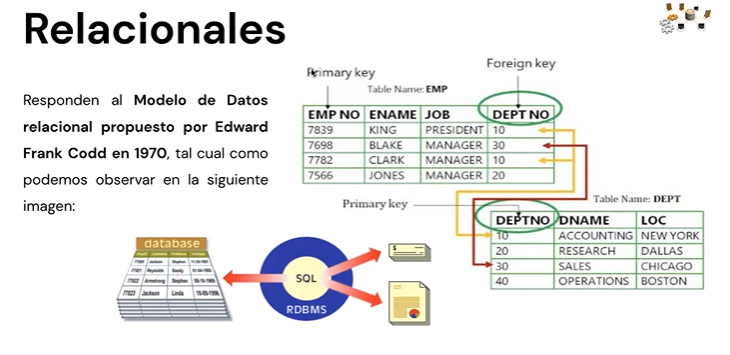

Una base de datos relacional contiene n tablas que están relacionadas entre sí por alguna variable.
Representa datos en 2 dimensiones, el lenguaje predilecto de manipulación es SQL Structured query lenguage. 

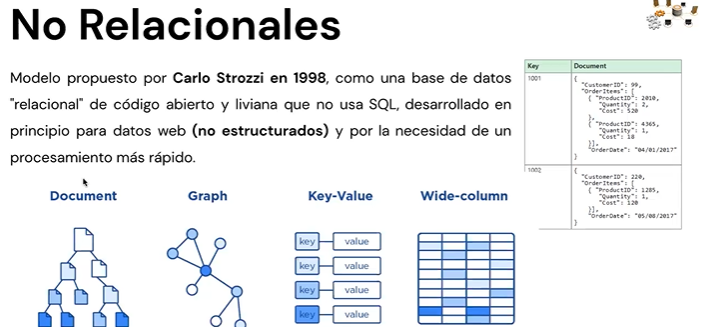

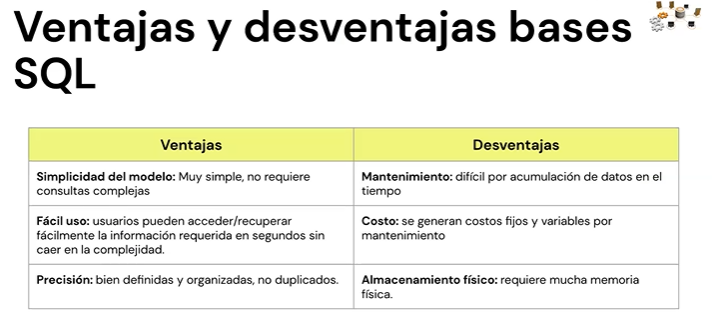

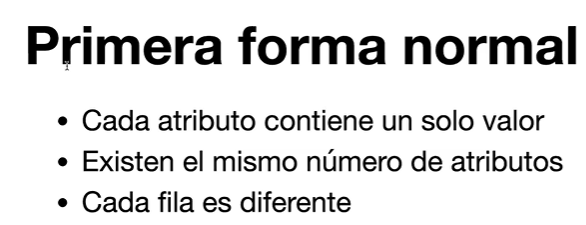

Ej en la siguiente tabla no se cumple la primera forma normal ya que hay una columna con más de un valor 
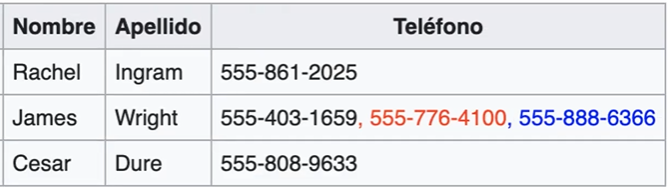

La solución a este problema sería crear una tabla así
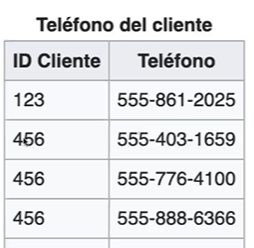

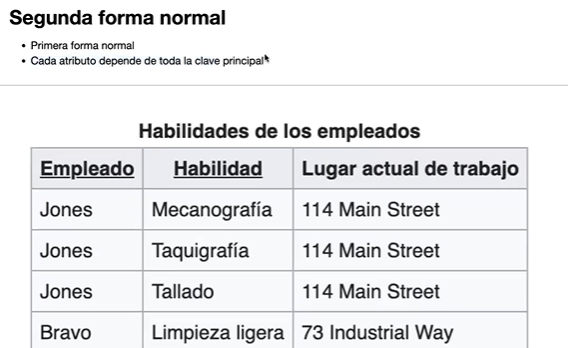

La forma correcta es dividir la información en dos tablas distintas, una que se el trabajador y el lugar de trabajo y otra que consigne las habilidades de los empleados

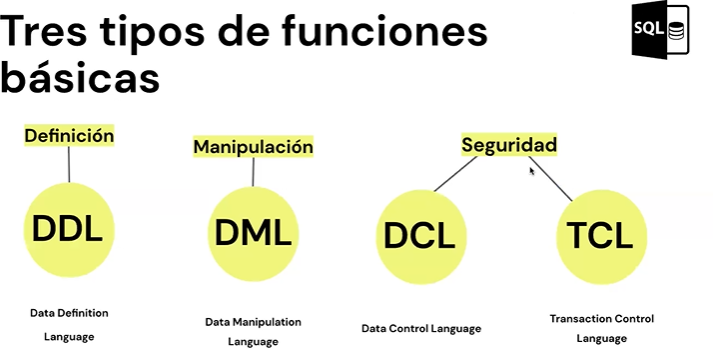

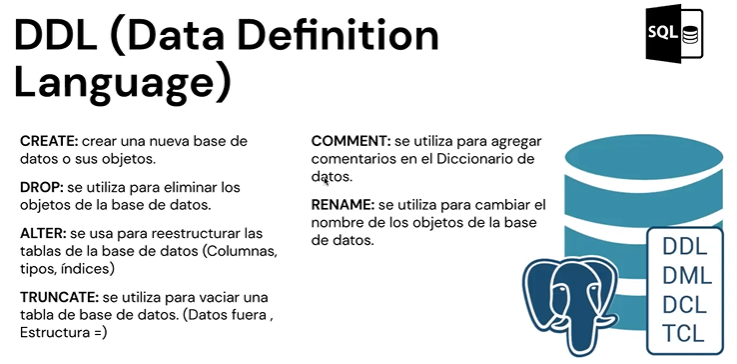

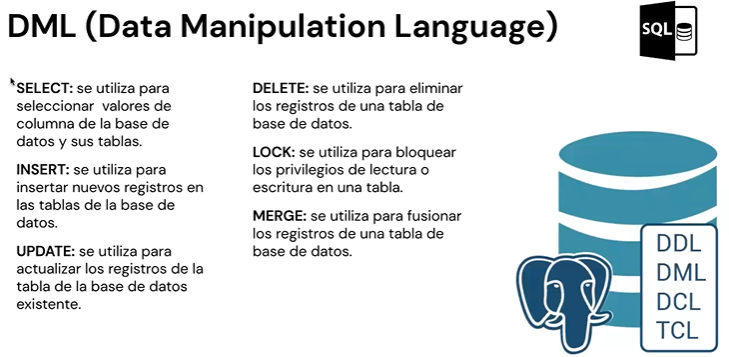

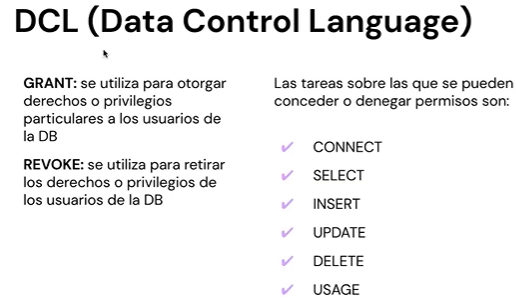